# Supervised Learning Model Evaluation for stroke diagnosis

Stroke diagnosis involves a comprehensive assessment to determine the presence, type, and severity of a stroke, a serious medical condition characterized by disrupted blood flow to the brain along with demographic details of the patients. 

DATA DESCRIPTION FOR CATEGORICAL VARIABLE:

1. gender:
Male = 1
Female = 2
Other = 3

2. ever_married:
Yes = 1
No = 2

3. work_type:
Children = 1
Private = 2
Self-employed = 3
Govt_job = 4
Never_worked = 5

4. Residence_type:
Rural = 1
Urban = 2

5. Smoking status:
smokes = 1
unknown = 2
formerly smoked = 3
never smoked = 4


1. Import the stroke.csv dataset, get info, print header and examine the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

stroke = pd.read_csv('./stroke.csv')
print(stroke.info())
stroke.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1136 non-null   int64  
 1   age                1136 non-null   int64  
 2   hypertension       1136 non-null   int64  
 3   heart_disease      1136 non-null   int64  
 4   ever_married       1136 non-null   int64  
 5   work_type          1136 non-null   int64  
 6   Residence_type     1136 non-null   int64  
 7   avg_glucose_level  1136 non-null   float64
 8   bmi                1084 non-null   float64
 9   smoking_status     1136 non-null   int64  
 10  stroke             1136 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 97.8 KB
None


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0


2. The target variable is stroke, perform model evaluation by comparing 4 different algorithms. Determine the model accuracy. Plot confusion matrix for all four algorithms. Compare the model accuracy and determine which algorithm is the best fit to predict the diagnosis of stroke. 

In [2]:
# check for NaN values

print(stroke.info())
print(stroke.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1136 non-null   int64  
 1   age                1136 non-null   int64  
 2   hypertension       1136 non-null   int64  
 3   heart_disease      1136 non-null   int64  
 4   ever_married       1136 non-null   int64  
 5   work_type          1136 non-null   int64  
 6   Residence_type     1136 non-null   int64  
 7   avg_glucose_level  1136 non-null   float64
 8   bmi                1084 non-null   float64
 9   smoking_status     1136 non-null   int64  
 10  stroke             1136 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 97.8 KB
None
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  

In [3]:
stroke.dropna(inplace = True) # remove NaN
print(stroke.isnull().sum())
print(stroke.shape)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
(1084, 11)


In [4]:
y = stroke['stroke'] # target
X = stroke.drop(['stroke'], axis=1) # inputs

In [5]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
# determine model accuracy
accuracies = {} # empty dictionary to combine the accuracies of all the algorithms

lr = LogisticRegression(max_iter = 1000) # create model
lr.fit(X_train, y_train) # fit the training data

acc = lr.score(X_test, y_test)*100 # compute accuracy of the model

accuracies['Logistic Regression'] = acc
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 86.64%


In [7]:
dtc = DecisionTreeClassifier() # create model
dtc.fit(X_train, y_train) # fit the training data

acc = dtc.score(X_test, y_test)*100 # compute accuracy of the model

accuracies['DecisionTreeClassifier'] = acc
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 82.49%


In [8]:
rfc = RandomForestClassifier() # create model
rfc.fit(X_train, y_train) # fit the training data

acc = rfc.score(X_test, y_test)*100 # compute accuracy of the model

accuracies['RandomForestClassifier'] = acc
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 89.40%


In [9]:
knc = KNeighborsClassifier() # create model
knc.fit(X_train, y_train) # fit the training data

acc = knc.score(X_test, y_test)*100 # compute accuracy of the model

accuracies['KNeighborsClassifier'] = acc
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 87.56%


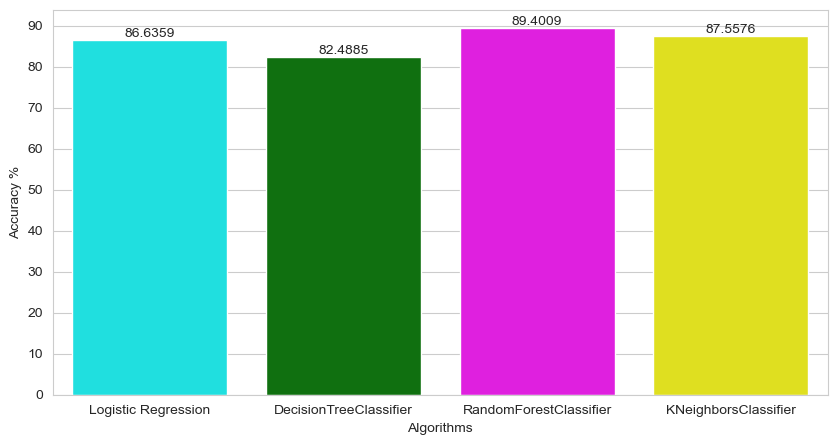

In [10]:
# plot bar graph to compare algorithms' accuracy
colors = ['cyan', 'green', 'magenta', 'yellow']

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0, 100,10))
plt.ylabel('Accuracy %')
plt.xlabel('Algorithms')
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

In [11]:
# confusion matrix
from sklearn.metrics import confusion_matrix

y_head_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test,y_head_lr)

y_head_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

y_head_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test,y_head_rfc)

y_head_knc = knc.predict(X_test)
cm_knc = confusion_matrix(y_test,y_head_knc)

<Axes: title={'center': 'K Neighbors Classifier Confusion Matrix'}>

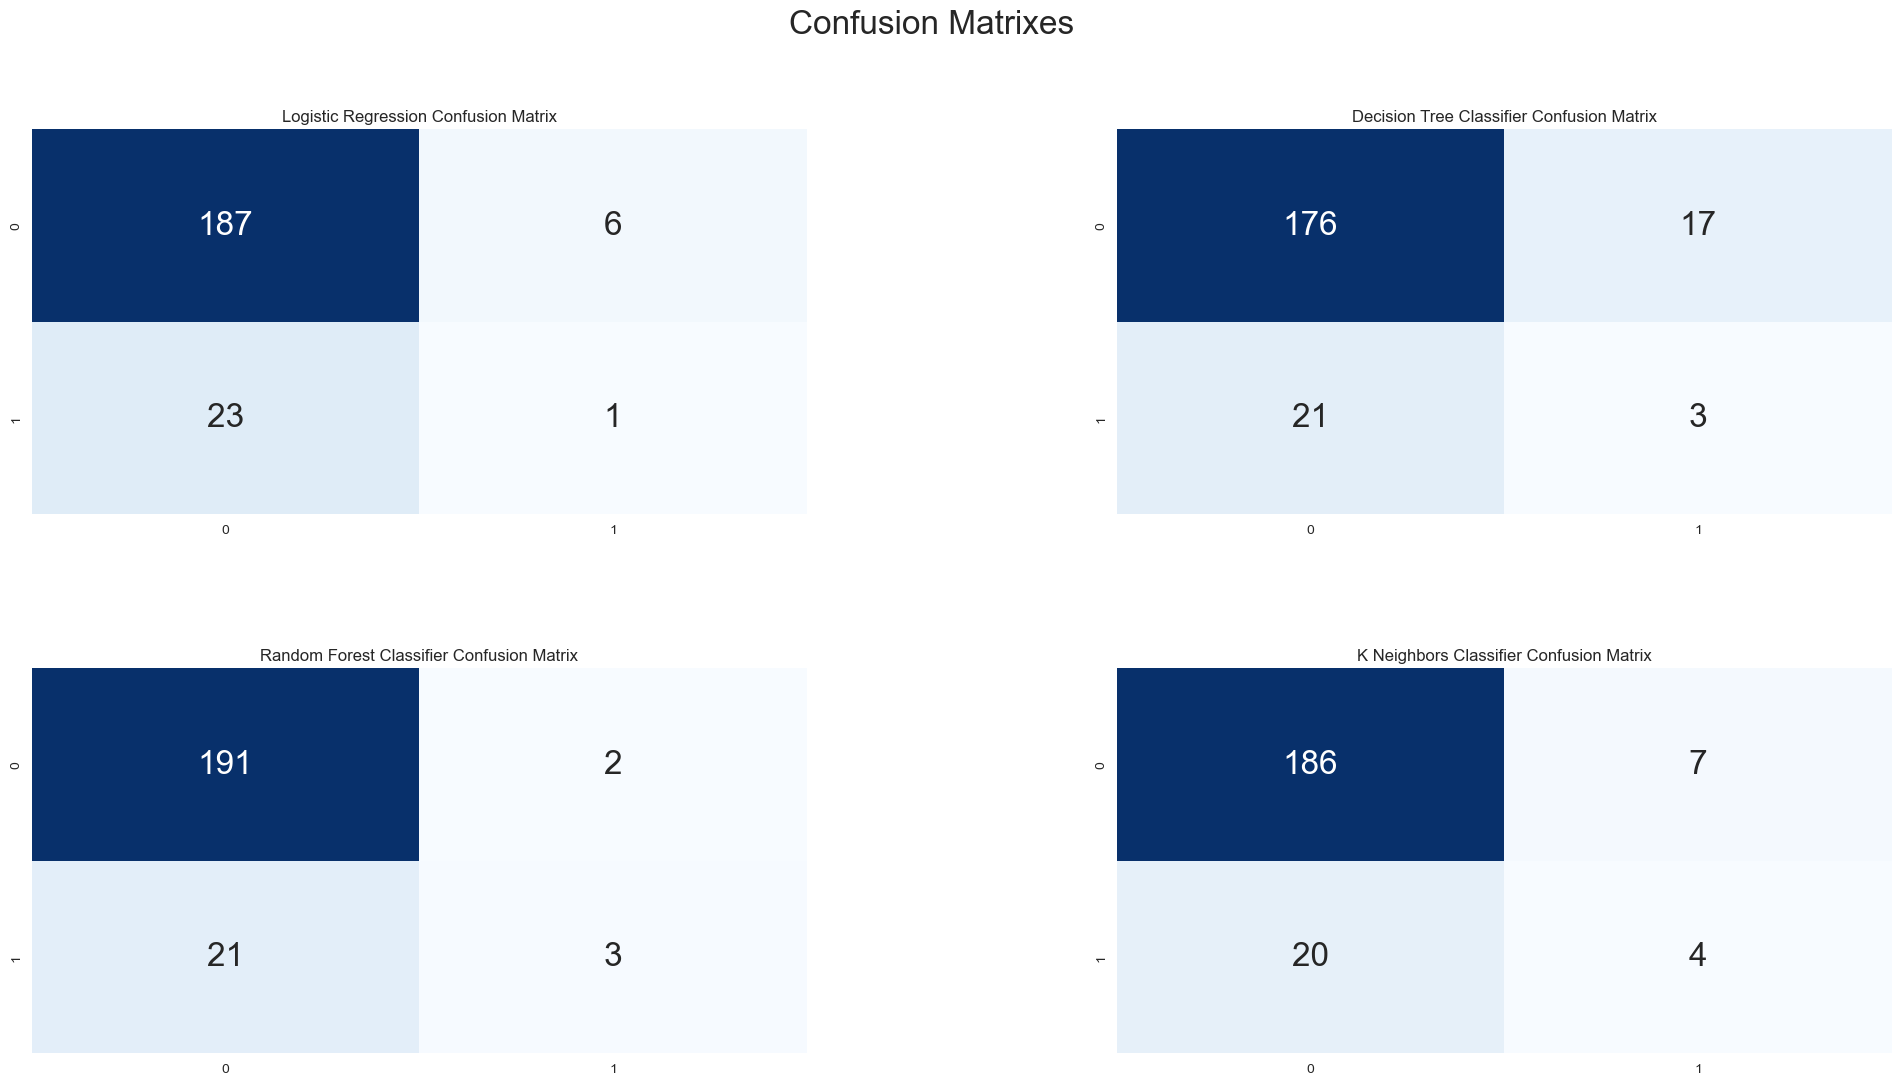

In [12]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rfc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("K Neighbors Classifier Confusion Matrix")
sns.heatmap(cm_knc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

The best algorithm is Random Forest Classifier because it has the highest accuracy at 88.94%

### Feature Importance

In [13]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

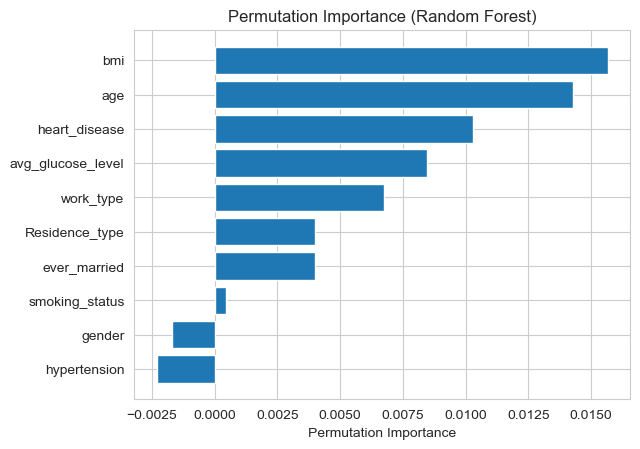

In [14]:
# permutation importance
perm_importance = permutation_importance(rfc, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()


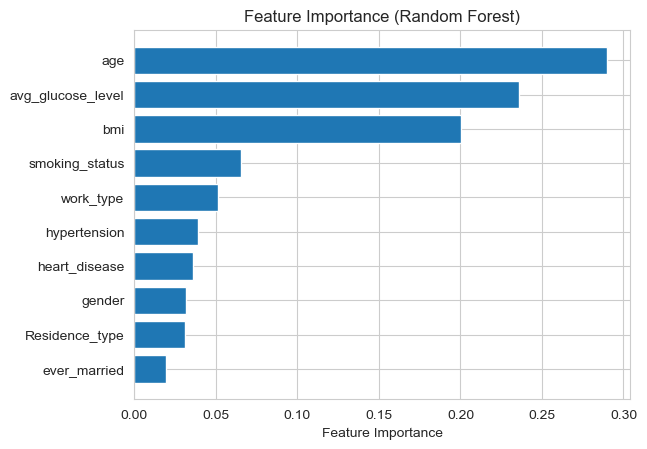

In [15]:
# random forest importances
rf_feature_importances = rfc.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [16]:
y = stroke['stroke']
X = stroke[['age', 'avg_glucose_level', 'bmi']]

In [17]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
rfc.fit(X_train, y_train)

# Predictions
y_pred = rfc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.871


In [19]:
#pip install pydotplus
#conda install -c anaconda graphviz

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision tree
import matplotlib.pyplot as plt
import pydotplus

In [21]:
important_features = ['age', 'avg_glucose_level', 'bmi', 'work_type']

f = stroke[important_features] #input
t = stroke['stroke'] #target

In [22]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True